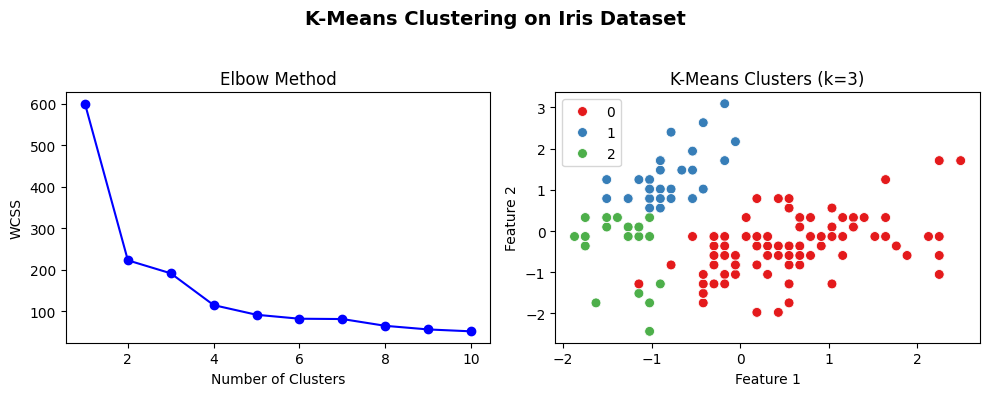

In [4]:
# K-Means Clustering on Iris Dataset
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import seaborn as sns

# Step 1: Load dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Step 2: Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(df)

# Step 3: Find optimal number of clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Step 4: Plot Elbow Method and Clusters on same page
plt.figure(figsize=(10, 4))

# Elbow Method
plt.subplot(1, 2, 1)
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

# Step 5: Apply K-Means with optimal clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 6: Visualize clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_kmeans, palette='Set1', s=50)
plt.title('K-Means Clusters (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.suptitle('K-Means Clustering on Iris Dataset', fontsize=14, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
